# Predictive Analysis of eVTOL Battery Degradation

<div style="text-align:center">
    <img src="img/evtol.jpg" alt="eVTOL" width="1000" style="margin:10px">
</div>

## 1. Introduction and context

### 1.1 Understanding eVTOLs
eVTOL (electric Vertical Take-Off and Landing) aircraft represent the frontier of urban air mobility. These vehicles combine the vertical lift capabilities of helicopters with the efficiency and range of fixed-wing aircraft, all powered by electric propulsion systems. Examples include air taxis, delivery drones, and personal air vehicles being developed by companies like Joby Aviation, Lilium, and Archer.

Unlike conventional electric vehicles that can simply stop when battery issues arise, eVTOLs operate in three-dimensional airspace where battery failures could have catastrophic consequences. This creates unique requirements for battery reliability, predictability, and safety that exceed those of ground-based electric transportation.

### 1.2 Critical battery challenges in eVTOL applications
eVTOL batteries face distinct challenges compared to other electric devices:

- **High power density requirements**: Need to provide both sustained cruise power and peak power during take-off and landing
- **Extreme discharge profiles**: Rapid transitional phases with high current draws
- **Weight constraints**: Aviation's demanding weight restrictions require maximum energy density
- **Thermal management**: Limited cooling options in flight combined with high discharge rates
- **Safety redundancy**: Need for multiple backup systems and failure prediction
- **Operational reliability**: Must function consistently across varying atmospheric conditions

### 1.3 The battery degradation problem
Current battery estimation methods are inadequate for eVTOL applications:

- **Coulomb counting**: Measuring ampere-hours entering and leaving the battery
- **Open circuit voltage analysis**: Correlating resting voltage with state of charge
- **Impedance techniques**: Measuring changes in electrical characteristics

These conventional methods have important limitations:
- Accuracy significantly decreases as batteries age
- Inability to account for variable usage conditions
- Point-in-time estimates rather than predictive capabilities
- Insufficient reliability for critical applications like aviation

### 1.4 Our approach
This project aims to develop a machine learning-based predictive model capable of:
- Accurately predicting future battery capacity
- Incorporating the effects of different usage conditions
- Providing reliable estimates even for aging batteries
- Anticipating degradation before it becomes critical

## 2. The eVTOL battery dataset

### 2.1 Origin and purpose
The dataset was developed by researchers at Carnegie Mellon University to specifically study battery degradation in the context of eVTOL vehicles. It aims to address the lack of data on battery behavior under mission profiles specific to these aerial vehicles.

<div style="text-align:center">
    <img src="img/cmu.jpg" alt="CMU" width="400" style="margin:10px">
</div>

### 2.2 Dataset characteristics
- **Cells tested**: Sony-Murata 18650 VTC-6
- **Collection period**: 2018-2019
- **Measured variables**: 10 parameters including voltage, current, temperature, energy
- **Varied protocols**: 20 files representing different conditions (extended cruise, variable temperature, power reduction)

<div style="text-align:center">
    <img src="img/battery_sony.webp" alt="Battery" width="400" style="margin:10px">
</div>

### 2.3 Dataset files and protocols

The dataset consists of multiple files, each representing a different testing protocol applied to Sony-Murata 18650 VTC-6 cells. These protocols were specifically designed to simulate various operational conditions that eVTOL batteries might experience:

#### 2.3.1 Baseline protocols
- [VAH01.csv](data/VAH01.csv), [VAH17.csv](data/VAH17.csv), [VAH27.csv](data/VAH27.csv): Standard testing protocols establishing reference performance metrics

#### 2.3.2 Flight profile variations
- **Extended cruise durations** ([VAH02.csv](data/VAH02.csv), [VAH15.csv](data/VAH15.csv), [VAH22.csv](data/VAH22.csv)): 1000-second cruise periods simulating longer flight times
- **Short cruise durations** ([VAH12.csv](data/VAH12.csv), [VAH13.csv](data/VAH13.csv), [VAH26.csv](data/VAH26.csv)): 400-600 second cruise periods for shorter missions
- **Power reductions** ([VAH05.csv](data/VAH05.csv), [VAH28.csv](data/VAH28.csv) at 10%; [VAH11.csv](data/VAH11.csv) at 20%): Simulating different thrust requirements

#### 2.3.3 Charging variations
- **Reduced charge currents** ([VAH06.csv](data/VAH06.csv), [VAH24.csv](data/VAH24.csv) at C/2; [VAH16.csv](data/VAH16.csv), [VAH20.csv](data/VAH20.csv) at 1.5C): Different charging speeds
- **Lower charge voltages** ([VAH07.csv](data/VAH07.csv) at 4.0V; [VAH23.csv](data/VAH23.csv) at 4.1V): Different depth-of-charge limits

#### 2.3.4 Environmental conditions
- **Temperature variations** ([VAH09.csv](data/VAH09.csv), [VAH25.csv](data/VAH25.csv) at 20°C; [VAH10.csv](data/VAH10.csv) at 30°C; [VAH30.csv](data/VAH30.csv) at 35°C): Different operating temperatures

### 2.4 Relevance for predictive modeling

These varied protocols are essential for building a robust predictive model because:

1. **Comprehensive coverage**: They capture how batteries degrade under diverse operating conditions relevant to real-world eVTOL missions
2. **Parameter isolation**: Each protocol isolates specific variables (temperature, charge current, flight duration) to determine their individual impact on degradation
3. **Mission-specific insights**: The data allows for tailored predictions based on expected usage profiles
4. **Failure mode identification**: Different degradation patterns can be associated with specific operational characteristics
5. **Model generalization**: Training on such diverse conditions improves the model's ability to generalize to new scenarios

By leveraging these diverse datasets, we can build a predictive model that accounts for the multifaceted nature of battery degradation across various operational conditions, resulting in more reliable and actionable predictions for eVTOL applications.

### 2.5 Variables description for eVTOL battery degradation prediction

#### 2.5.1 Target variable

- **`QDischarge_mA_h` (max or in derived features)**:  
  The primary indicator of battery health and degradation we're attempting to predict. As batteries degrade, their capacity to store and deliver charge diminishes. This variable represents how much charge (in milliampere-hours) the battery can deliver during discharge.

#### 2.5.2 Key predictor variables

##### High-value predictors

1. **`Temperature__C`** (Temperature in degrees Celsius):  
   - Critical for degradation modeling as temperature significantly accelerates chemical aging processes  
   - Both high and low temperature extremes affect different degradation mechanisms  
   - Thermal patterns during charge/discharge cycles reveal battery health  

2. **`Ecell_V`** (Cell Voltage):  
   - Voltage profiles during charge/discharge contain rich information about internal chemistry  
   - Voltage plateaus and transitions indicate state of health  
   - End-of-discharge voltage drops correlate with capacity fade  

3. **`I_mA`** (Current in milliamperes):  
   - Current demand patterns directly impact degradation rates  
   - Peak currents during take-off phases are particularly stressful  
   - Current response to load changes indicates internal resistance trends  

4. **`cycleNumber`**:  
   - Fundamental aging metric, though non-linear relationship with degradation  
   - Allows tracking of progressive deterioration patterns  
   - **Note**: According to documentation, may have accuracy issues due to tester recording methods  

##### Potentially redundant variables

1. **Energy vs. Charge Measurements**:  
   - **`EnergyCharge_W_h`** and **`QCharge_mA_h`**: Both measure charging input but in different units  
   - **`EnergyDischarge_W_h`** and **`QDischarge_mA_h`**: Similarly for discharge  
   - These pairs are mathematically related (`Energy = Charge × Average Voltage`) but both may be valuable as they capture different aspects of efficiency  

##### Secondary predictors

1. **`time_s`** (Time since beginning of experiment):  
   - More useful for calculating derived features than as a direct predictor  
   - Examples: `dV/dt` (voltage slew rate), `dQ/dt` (current rates), etc.  

2. **`Ns`** (Cycle segment):  
   - Categorical variable identifying charge/discharge/rest phases  
   - Useful for segmenting the data but requires encoding for model input  
   - Patterns in specific segments (e.g., CV phase duration) correlate with degradation

## 3. A first data analysis
In this section we will conduct a first data analysis on the baseline dataset VAHO1.csv.
This baseline protocol represents standard operating conditions against which other experimental protocols can be compared. By analyzing this reference dataset first, we establish foundational patterns and metrics for battery behavior before examining variations introduced in other testing protocols.

The baseline profile is:
- High power discharge (takeoff)
- Low power discharge (cruise)
- High power discharge (landing)
- Rest to allow temperature to moderate
- Constant current charge
- Constant voltage charge
- Rest

### 3.1 Import required libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style('whitegrid')

### 3.2 Load and explore the dataset

In [302]:
# Load the dataset
file_path = 'data/VAH01.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,time_s,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns
0,0.000000,3.538717,1491.3828,0.000000,0.000000,0.0,0.0,21.139246,0,0
1,10.000000,3.545570,1492.1708,0.014693,4.144108,0.0,0.0,21.115524,0,0
2,20.000001,3.549980,1491.5797,0.029405,8.288285,0.0,0.0,21.305294,0,0
3,30.000001,3.553131,1492.3679,0.044130,12.432512,0.0,0.0,21.574135,0,0
4,40.000002,3.555572,1490.9886,0.058865,16.576689,0.0,0.0,21.510880,0,0


In [206]:
# Display summary statistics of the dataset
data.describe()

,time_s,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns
count,9.493020e+05,949302.000000,949302.000000,949302.000000,949302.000000,949302.000000,949302.000000,949302.000000,949302.000000,949302.000000
mean,5.572319e+06,3.787582,-967.470588,6.803789,417.768657,-3.330363,883.612750,34.309831,75.268802,4.048376
std,3.508380e+06,0.345977,3274.014037,1.471954,708.936620,3.090961,829.638790,4.579753,100.488994,2.339807
min,0.000000e+00,2.499966,-19883.938000,0.000000,0.000000,-11.277983,0.000000,29.150253,0.000000,0.000000
25%,2.467731e+06,3.582680,-596.376040,6.933027,0.000000,-6.234047,0.000000,31.420279,2.000000,1.000000
50%,5.294302e+06,3.818433,-593.617130,7.155079,0.000000,-2.853661,736.301513,32.176952,6.000000,5.000000
75%,8.527730e+06,4.063248,64.345238,7.345819,700.998036,0.000000,1664.103737,36.425362,141.000000,5.000000
max,1.176946e+07,4.214139,3010.878200,11.828232,3062.297938,0.000000,3085.544718,69.837273,407.000000,9.000000


In [222]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

time_s                 0
Ecell_V                0
I_mA                   0
EnergyCharge_W_h       0
QCharge_mA_h           0
EnergyDischarge_W_h    0
QDischarge_mA_h        0
Temperature__C         0
cycleNumber            0
Ns                     0
dtype: int64

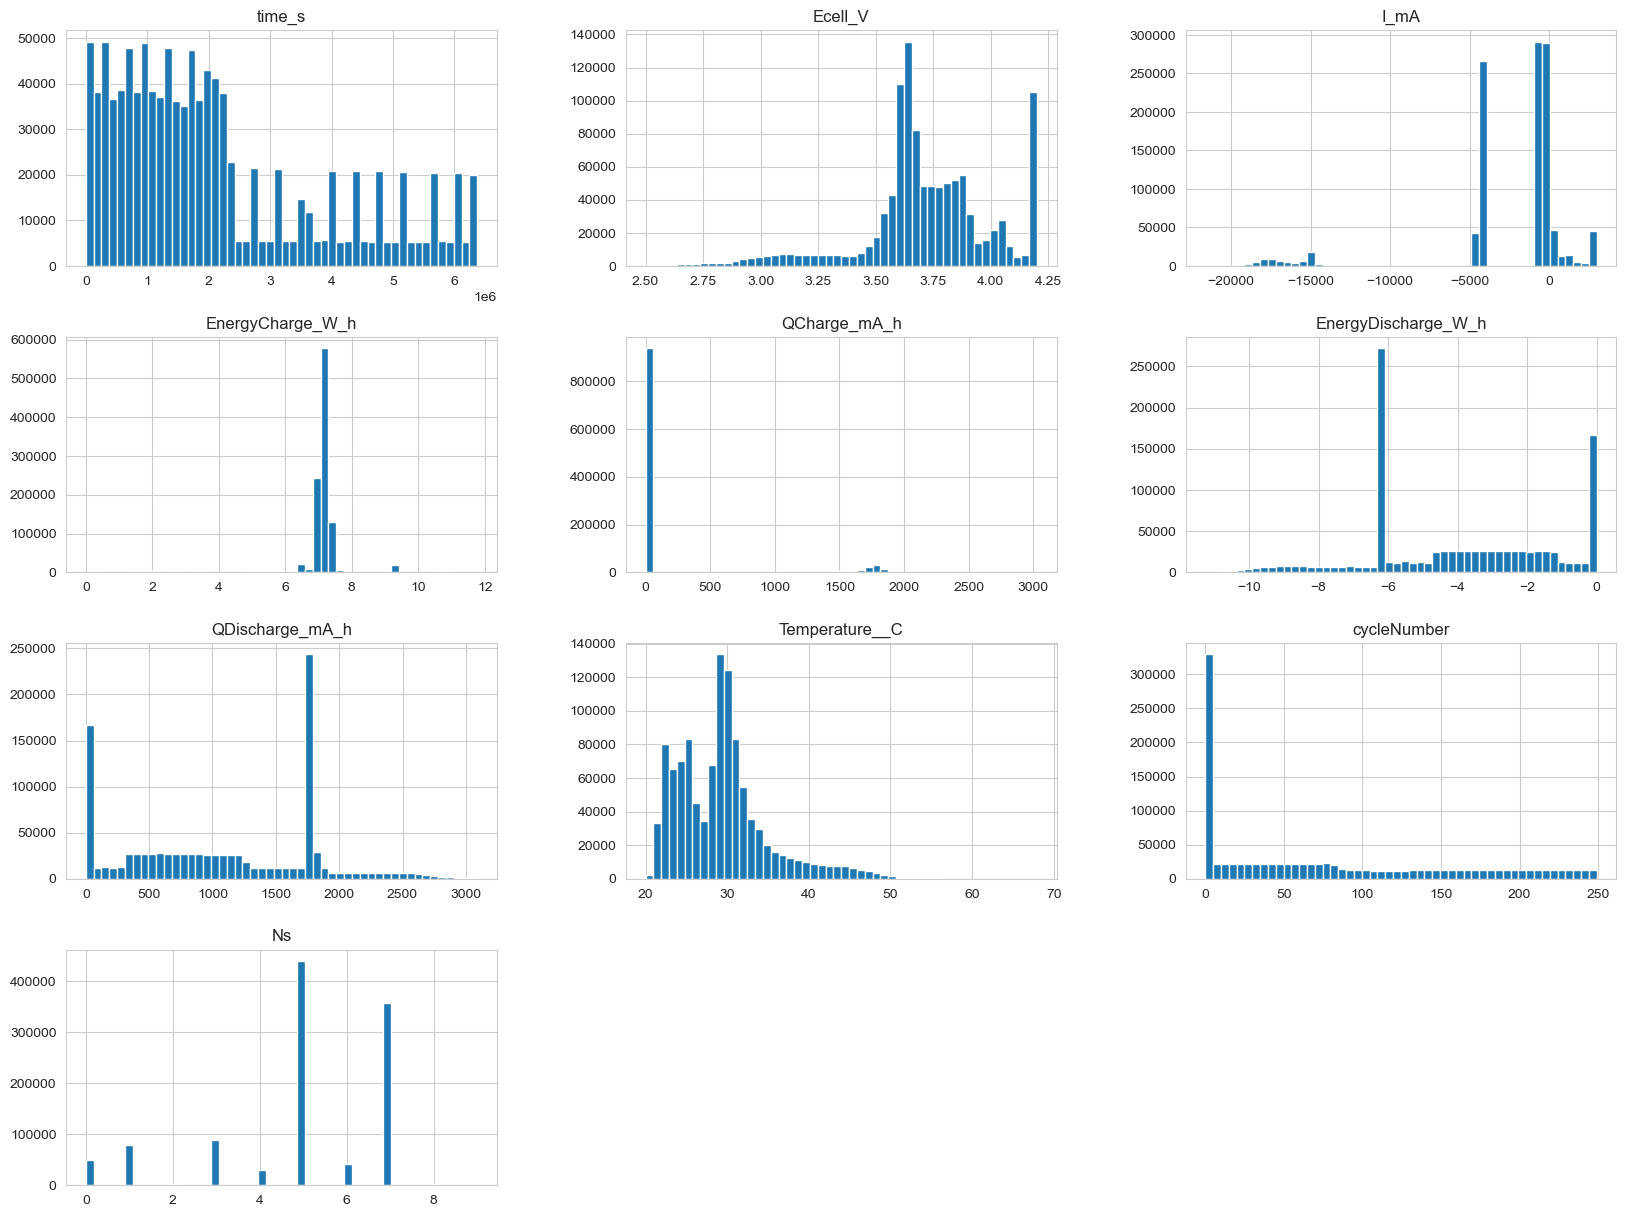

In [223]:
# Plot the distribution of each feature
data.hist(bins=50, figsize=(20, 15))
plt.show()

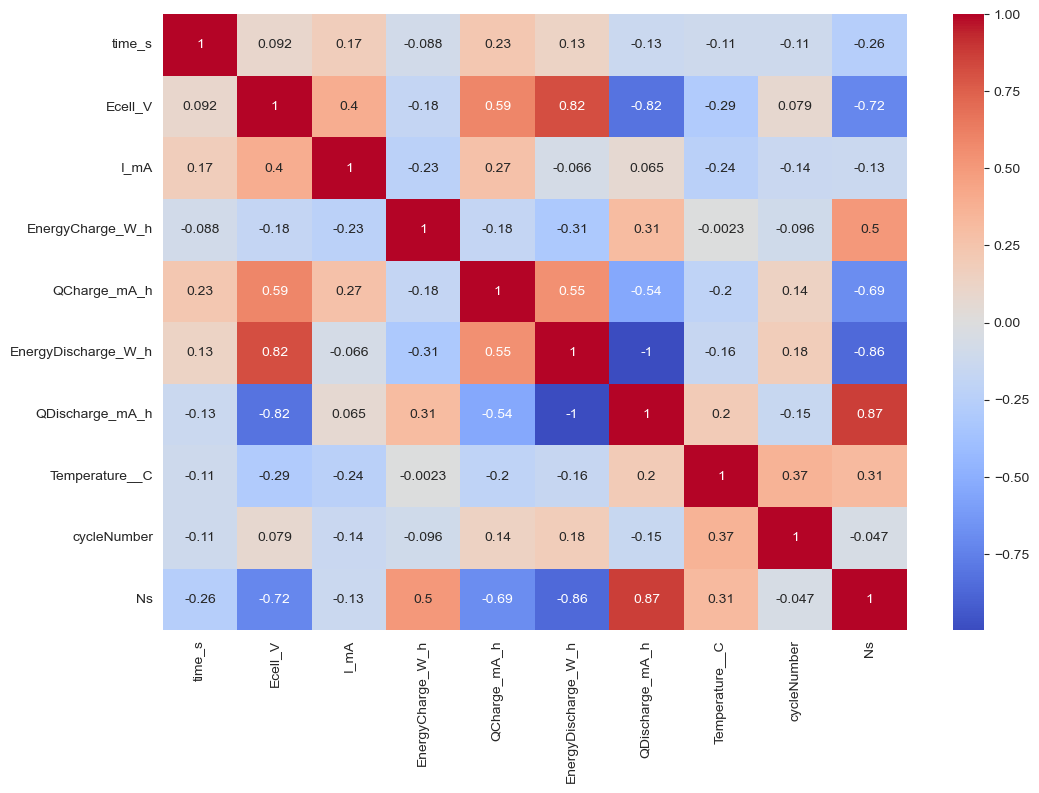

In [117]:
# Plot the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### 3.3 Data processing and cycle count correction

The battery cell follows a specific cycling protocol that is repeated to simulate its usage.
- Step 0: Constant current charge
- Step 1: Constant voltage charge
- Step 3: Rest
- Step 4: High power discharge (takeoff)
- Step 5: Low power discharge (cruise)
- Step 6: High power discharge (landing)
- Step 7: Rest to allow temperature to moderate

To differentiate the test sessions from the usage cycles, we process the data as follows:
1. Identify transition points by detecting sudden drops and rises in cycle numbers
3. Mark these transition-related cycles as "test cycles" in a new boolean column (`is_test_cycle`)
4. Create a continuous cycle numbering system (`continuous_cycle`) across all data points

This process allows us to distinguish between normal operational cycles and test/transition cycles without removing data. The continuous cycle numbering enables us to track the cell's aging progression correctly throughout its lifetime while maintaining access to all original data points.

In [ ]:
# 1. Keep all data, including cycle 0
data_cleaned = data.copy()

# 2. Find cycle drops and rises
data_cleaned['cycle_diff'] = data_cleaned['cycleNumber'].diff()
drops = data_cleaned[data_cleaned['cycle_diff'] < -1].copy()  # Large negative differences
rises = data_cleaned[data_cleaned['cycle_diff'] > 1].copy()   # Large positive differences

print(f"Found {len(drops)} cycle drops in the data")
print(f"Found {len(rises)} cycle rises in the data")

# 3. Create a list of cycles to mark as test cycles
test_cycles = []
# Add cycle 0 to test cycles (calibration/initialization data)
test_cycles.append(0)
print("Marked cycle 0 as test cycle")

for idx in drops.index:
    # Get the transition cycle
    transition_cycle = data_cleaned.loc[idx, 'cycleNumber']
    test_cycles.append(transition_cycle)
    
    # Get the cycle number of the previous point
    if idx > 0:
        prev_point_cycle = data_cleaned.loc[idx - 1, 'cycleNumber']
        if prev_point_cycle not in test_cycles:
            test_cycles.append(prev_point_cycle)
            print(f"Marked previous cycle {prev_point_cycle} before transition as test cycle")
    
    # Find the next rise point after this drop
    rise_points = rises[rises.index > idx]
    if not rise_points.empty:
        rise_idx = rise_points.index[0]
        rise_cycle = data_cleaned.loc[rise_idx, 'cycleNumber']
        
        # Add the rise cycle
        if rise_cycle not in test_cycles:
            test_cycles.append(rise_cycle)
            print(f"Marked rise cycle {rise_cycle} as test cycle")
        
        # Add only the next cycle after the rise
        next_cycle = rise_cycle + 1
        if next_cycle not in test_cycles:
            test_cycles.append(next_cycle)
            print(f"Marked next cycle {next_cycle} after rise as test cycle")
    
    print(f"Transition found: Cycle drops from {prev_point_cycle} to {transition_cycle} at time {data_cleaned.loc[idx, 'time_s']}")

# 4. Create boolean column to mark test cycles
data_cleaned['is_test_cycle'] = data_cleaned['cycleNumber'].isin(test_cycles)

print(f"Marked {data_cleaned['is_test_cycle'].sum()} data points as test cycles")
print(f"Normal cycles data points: {(~data_cleaned['is_test_cycle']).sum()}")

KeyError: 'cycle_diff'

In [294]:
# Create dataset with only test cycles
data_test = data[data['is_test_cycle']].copy()

# Create dataset with only regular cycles (non-test cycles)
data_regular = data[~data['is_test_cycle']].copy()

# Display information about both datasets
print(f"Original dataset: {len(data)} data points")
print(f"Test cycles dataset: {len(data_test)} data points ({len(data_test)/len(data)*100:.2f}%)")
print(f"Regular cycles dataset: {len(data_regular)} data points ({len(data_regular)/len(data)*100:.2f}%)")

# Display unique cycle numbers in each dataset
print(f"\nUnique cycle numbers in test dataset: {len(data_test['cycleNumber'].unique())}")
print(f"Unique cycle numbers in regular dataset: {len(data_regular['cycleNumber'].unique())}")

# Display sample of test cycles
print("\nSample of test cycles:")
print(sorted(data_test['cycleNumber'].unique())[:10])

# Display continuous cycle range for each dataset
print(f"\nContinuous cycle range in test dataset: {data_test['continuous_cycle'].min()} to {data_test['continuous_cycle'].max()}")
print(f"Continuous cycle range in regular dataset: {data_regular['continuous_cycle'].min()} to {data_regular['continuous_cycle'].max()}")

Original dataset: 1091477 data points
Test cycles dataset: 373161 data points (34.19%)
Regular cycles dataset: 718316 data points (65.81%)

Unique cycle numbers in test dataset: 19
Unique cycle numbers in regular dataset: 231

Sample of test cycles:
[0, 1, 2, 3, 4, 49, 50, 51, 78, 99]

Continuous cycle range in test dataset: 0 to 2371
Continuous cycle range in regular dataset: 5 to 2369


In [301]:
# 5. Create continuous cycle numbering
data_cleaned = data_regular.copy()
data_cleaned['continuous_cycle'] = data_cleaned['cycleNumber'].copy()

# Find segments where cycle numbers need offset
segments = []
start_idx = 0
for i in range(1, len(data_cleaned)):
    if data_cleaned.loc[i, 'cycleNumber'] < data_cleaned.loc[i-1, 'cycleNumber']:
        segments.append((start_idx, i-1))
        start_idx = i
segments.append((start_idx, len(data_cleaned)-1))

# Apply offsets to create continuous cycle numbers
offset = 0
for i, (start, end) in enumerate(segments):
    if i > 0:
        offset += data_cleaned.iloc[segments[i-1][1]]['cycleNumber']
        data_cleaned.loc[start:end, 'continuous_cycle'] += offset

# Final cleanup
data_regular = data_cleaned.drop(['cycle_diff'], axis=1)

print(f"Original cycle range: {data['cycleNumber'].min()} to {data['cycleNumber'].max()}")
print(f"Continuous cycle range: {data['continuous_cycle'].min()} to {data['continuous_cycle'].max()}")

KeyError: 1

### 3.4 Visualization of the regular dataset

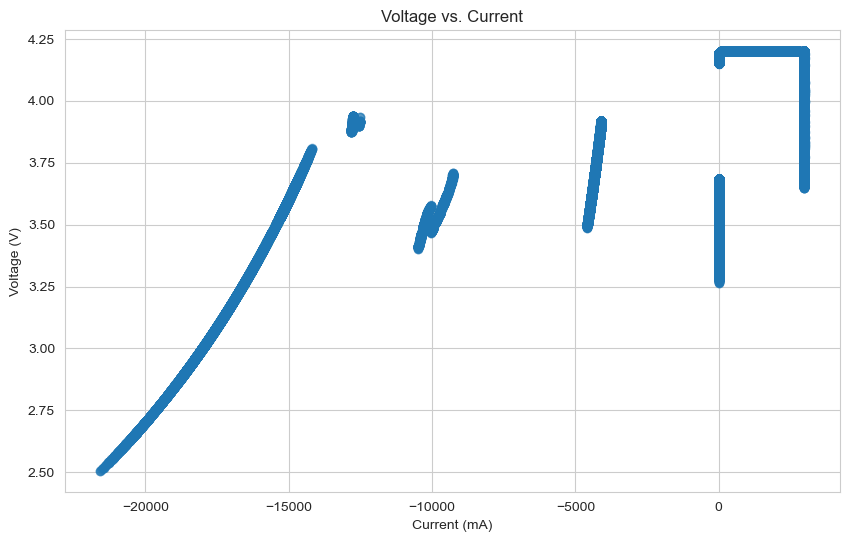

In [268]:
# Plot voltage vs. current for the entire dataset
plt.figure(figsize=(10, 6))
plt.scatter(data_regular['I_mA'], data_regular['Ecell_V'], alpha=0.5)
plt.title('Voltage vs. Current')
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.show()

There is no clear relation between Voltage and Current.

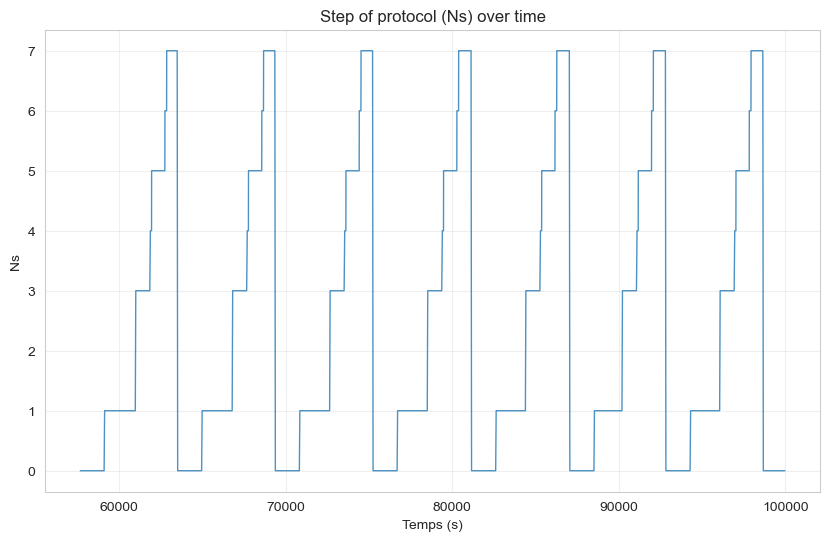

In [269]:
# Plot step of protocol over time
t_max = 100000

filtered_data = data_regular[data_regular['time_s'] <= t_max]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['time_s'], filtered_data['Ns'], linewidth=1, alpha=0.8)
plt.title('Step of protocol (Ns) over time')
plt.xlabel('Temps (s)')
plt.ylabel('Ns')
plt.grid(True, alpha=0.3)
plt.show()

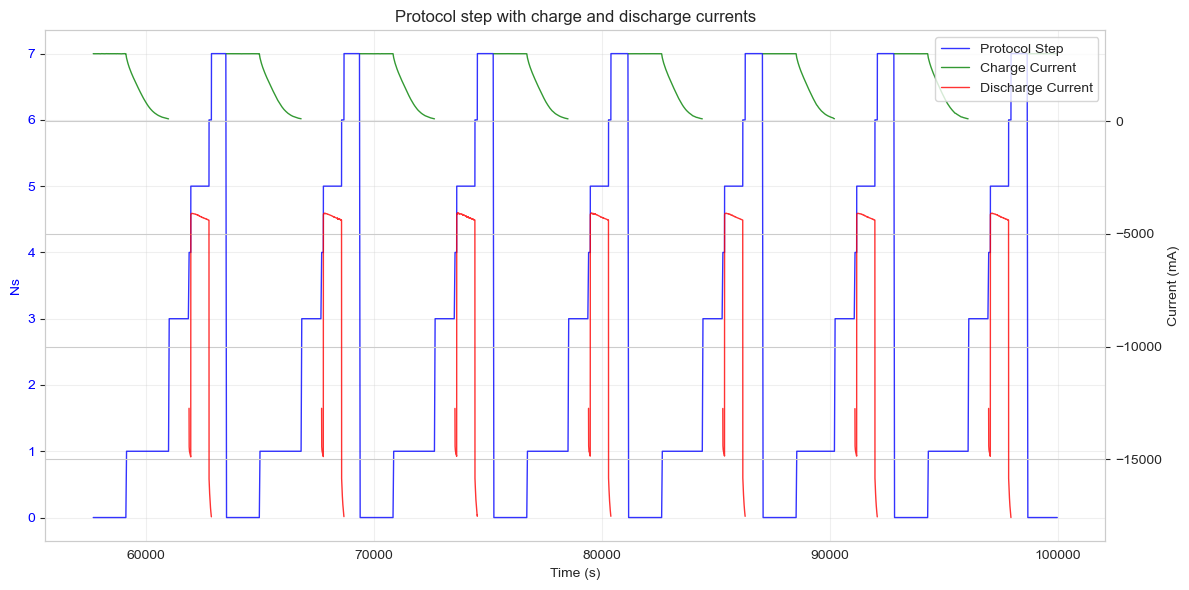

In [270]:
# Plot step of protocol along with charge and discharge currents over time
t_max = 100000

filtered_data = data_regular[data_regular['time_s'] <= t_max].copy()

# Separate charge (positive current) and discharge (negative current)
filtered_data['charge_current'] = filtered_data['I_mA'].copy()
filtered_data['discharge_current'] = filtered_data['I_mA'].copy()

# Set charge current to NaN during discharge
filtered_data.loc[filtered_data['I_mA'] <= 0, 'charge_current'] = np.nan

# Set discharge current to NaN during charge
filtered_data.loc[filtered_data['I_mA'] >= 0, 'discharge_current'] = np.nan

# Create figure with three y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y-axis: Protocol step (Ns)
color1 = 'blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Ns', color=color1)
ax1.plot(filtered_data['time_s'], filtered_data['Ns'], color=color1, linewidth=1, alpha=0.8, label='Protocol Step')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Second y-axis: Current (charge and discharge)
ax2 = ax1.twinx()
color2 = 'green'
color3 = 'red'
ax2.set_ylabel('Current (mA)')
ax2.plot(filtered_data['time_s'], filtered_data['charge_current'], color=color2, linewidth=1, alpha=0.8, label='Charge Current')
ax2.plot(filtered_data['time_s'], filtered_data['discharge_current'], color=color3, linewidth=1, alpha=0.8, label='Discharge Current')
ax2.tick_params(axis='y')

# Title
plt.title('Protocol step with charge and discharge currents')

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

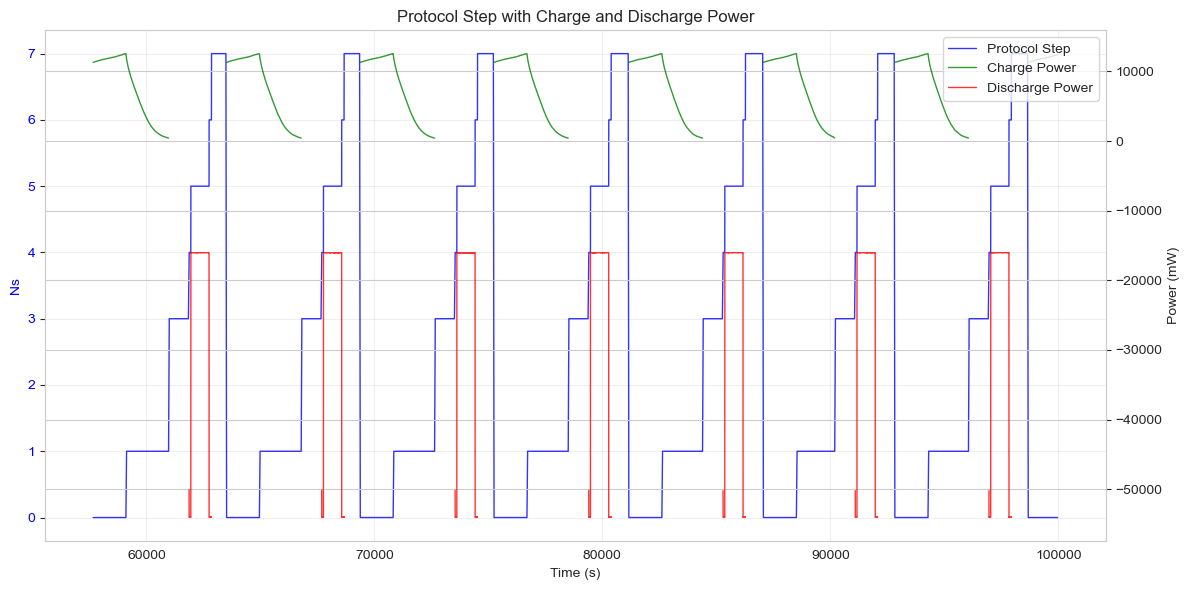

In [271]:
# Plot step of protocol along with charge and discharge power over time
t_max = 100000

filtered_data = data_regular[data_regular['time_s'] <= t_max].copy()

# Calculate power (P = V * I)
filtered_data['power_mW'] = filtered_data['Ecell_V'] * filtered_data['I_mA']

# Separate charge (positive power) and discharge (negative power)
filtered_data['charge_power'] = filtered_data['power_mW'].copy()
filtered_data['discharge_power'] = filtered_data['power_mW'].copy()

# Set charge power to NaN during discharge
filtered_data.loc[filtered_data['power_mW'] <= 0, 'charge_power'] = np.nan

# Set discharge power to NaN during charge
filtered_data.loc[filtered_data['power_mW'] >= 0, 'discharge_power'] = np.nan

# Create figure with three y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y-axis: Protocol step (Ns)
color1 = 'blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Ns', color=color1)
ax1.plot(filtered_data['time_s'], filtered_data['Ns'], color=color1, linewidth=1, alpha=0.8, label='Protocol Step')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Second y-axis: Power (charge and discharge)
ax2 = ax1.twinx()
color2 = 'green'
color3 = 'red'
ax2.set_ylabel('Power (mW)')
ax2.plot(filtered_data['time_s'], filtered_data['charge_power'], color=color2, linewidth=1, alpha=0.8, label='Charge Power')
ax2.plot(filtered_data['time_s'], filtered_data['discharge_power'], color=color3, linewidth=1, alpha=0.8, label='Discharge Power')
ax2.tick_params(axis='y')

# Title
plt.title('Protocol Step with Charge and Discharge Power')

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

Steps :
- 0 : Constant current charge
- 1 : Constant voltage charge 
- 3 : Rest
- 4 : High power discharge (takeoff)
- 5 : Low power discharge (cruise)
- 6 : High power discharge (landing)
- 7 : Rest to allow temperature to moderate

<Figure size 1200x600 with 0 Axes>

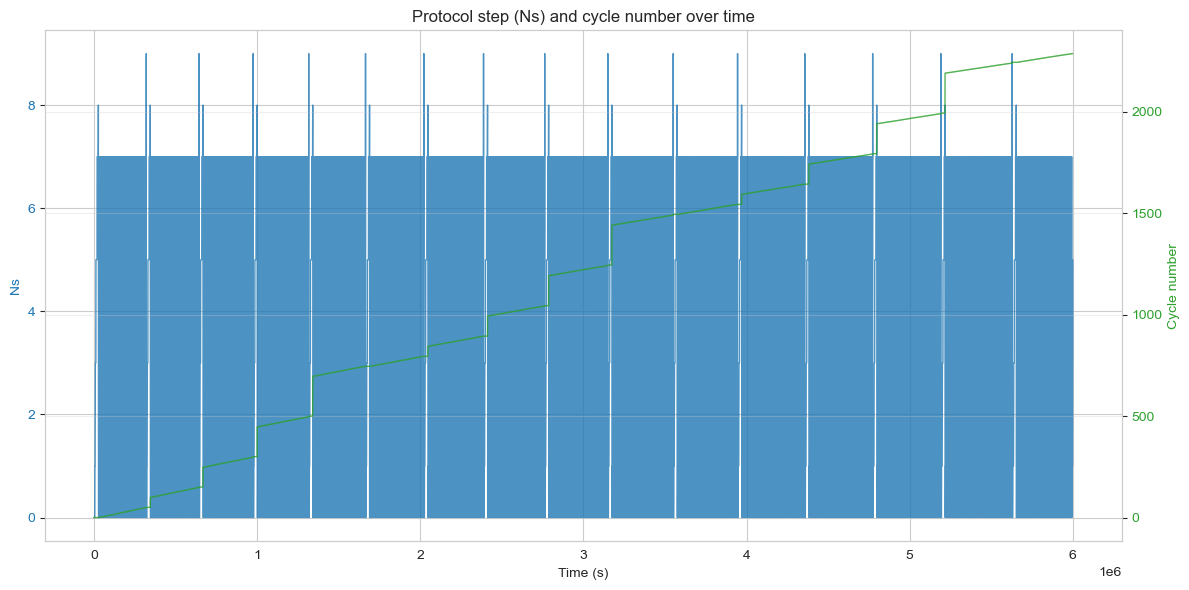

In [ ]:
t_max = 6000000

filtered_data = data_regular[data_regular['time_s'] <= t_max]

# Plot protocol step (Ns) and cycle number over time
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for Ns
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Ns', color=color)
ax1.plot(filtered_data['time_s'], filtered_data['Ns'], color=color, linewidth=1, alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color)

# Secondary axis for cycle number
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Cycle number', color=color)
ax2.plot(filtered_data['time_s'], filtered_data['continuous_cycle'], color=color, linewidth=1, alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Protocol step (Ns) and cycle number over time')
plt.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

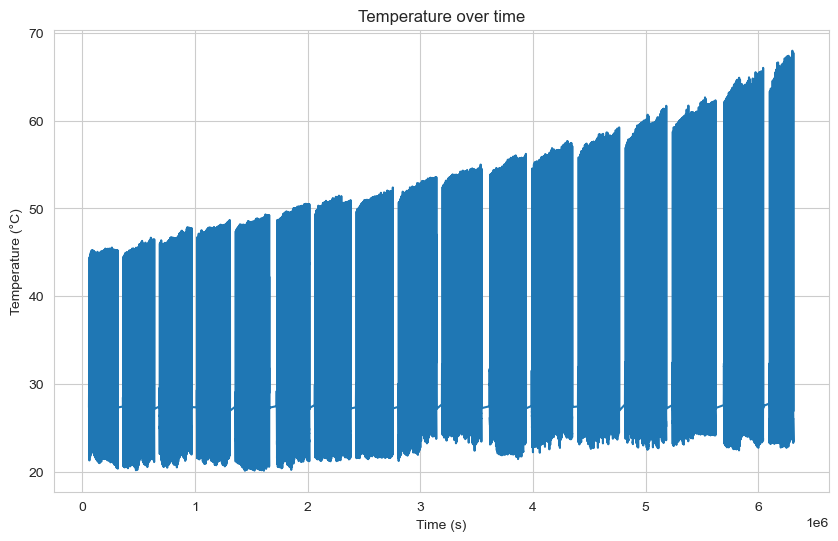

In [277]:
# Plot temperature over time
plt.figure(figsize=(10, 6))
plt.plot(data_regular['time_s'], data_regular['Temperature__C'])
plt.title('Temperature over time')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.show()

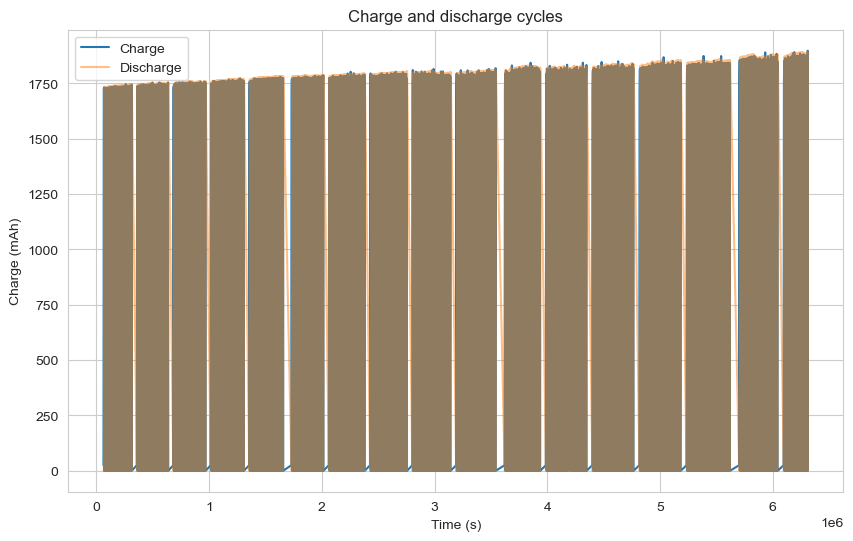

In [293]:
# Plot charge and discharge cycles
plt.figure(figsize=(10, 6))
plt.plot(data_regular['time_s'], data_regular['QCharge_mA_h'], label='Charge')
plt.plot(data_regular['time_s'], data_regular['QDischarge_mA_h'], alpha=0.5, label='Discharge')
plt.title('Charge and discharge cycles')
plt.xlabel('Time (s)')
plt.ylabel('Charge (mAh)')
plt.legend()
plt.show()

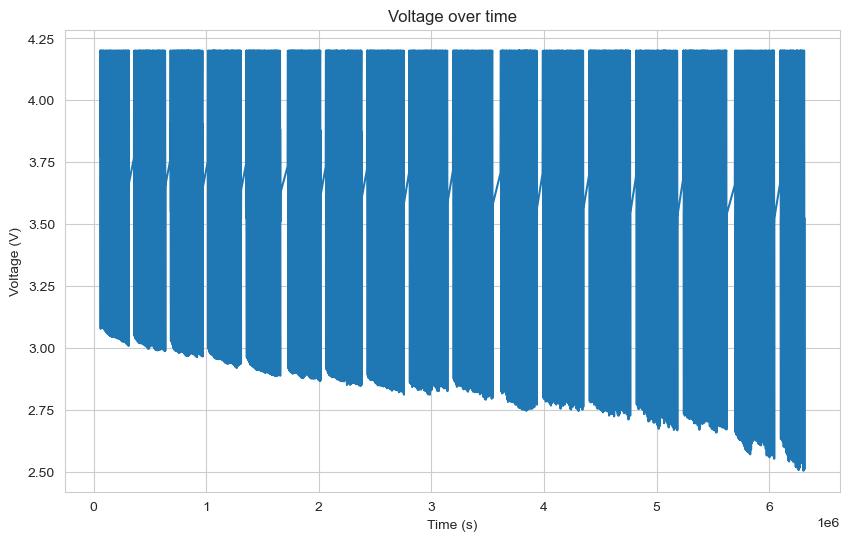

In [279]:
# Plot voltage over time
plt.figure(figsize=(10, 6))
plt.plot(data_regular['time_s'], data_regular['Ecell_V'])
plt.title('Voltage over time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

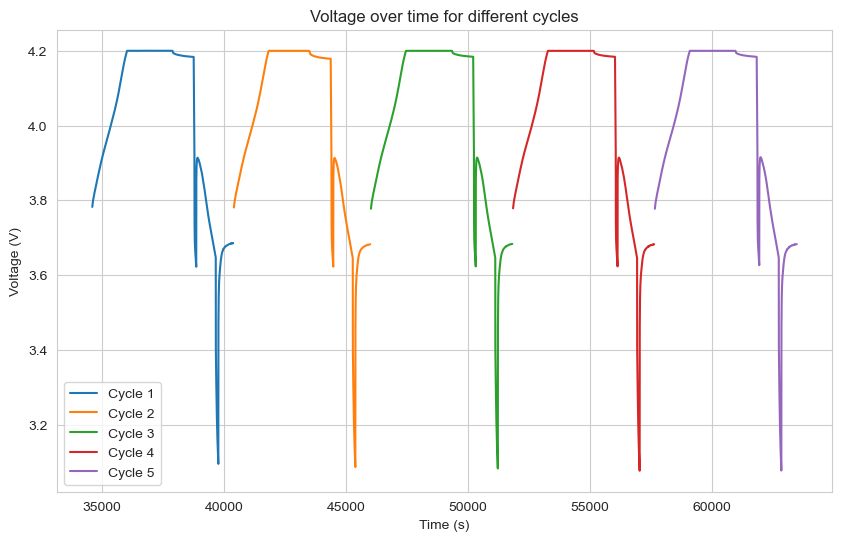

In [280]:
# Plot voltage over time for different cycles
unique_cycles = data['continuous_cycle'].unique()
plt.figure(figsize=(10, 6))
for cycle in unique_cycles[:5]:  # Plotting only the first 5 cycles for clarity
    cycle_data = data[data['continuous_cycle'] == cycle]
    plt.plot(cycle_data['time_s'], cycle_data['Ecell_V'], label=f'Cycle {cycle}')
plt.title('Voltage over time for different cycles')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

### 3.5 Visualization of the test dataset

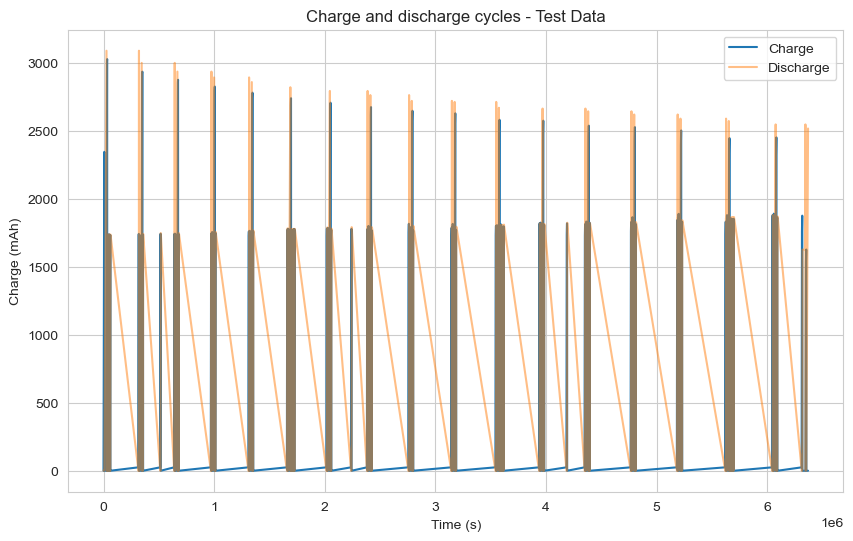

In [286]:
# Plot charge and discharge cycles for test data
plt.figure(figsize=(10, 6))
plt.plot(data_test['time_s'], data_test['QCharge_mA_h'], label='Charge')
plt.plot(data_test['time_s'], data_test['QDischarge_mA_h'], alpha=0.5, label='Discharge')
plt.title('Charge and discharge cycles - Test Data')
plt.xlabel('Time (s)')
plt.ylabel('Charge (mAh)')
plt.legend()
plt.show()

## 4. A first feature extraction
Extract meaningful features from the time series data such as charge/discharge capacity, energy efficiency, voltage drop rates, and temperature effects.

In [218]:
# Function to extract features from the dataset
def extract_features(df):
    features = {}
    
    # Charge capacity (mAh)
    features['charge_capacity'] = df['QCharge_mA_h'].max()
    
    # Discharge capacity (mAh)
    features['discharge_capacity'] = df['QDischarge_mA_h'].min()
    
    # Energy efficiency (discharge energy / charge energy)
    features['energy_efficiency'] = df['EnergyDischarge_W_h'].sum() / df['EnergyCharge_W_h'].sum()
    
    # Voltage drop rate (V/s)
    voltage_diff = df['Ecell_V'].diff().dropna()
    time_diff = df['time_s'].diff().dropna()
    features['voltage_drop_rate'] = (voltage_diff / time_diff).mean()
    
    # Average temperature (°C)
    features['avg_temperature'] = df['Temperature__C'].mean()
    
    # Time
    features['time'] = df['time_s'].max()
    
    return features

# Apply the feature extraction function to each cycle
cycle_features = []
for cycle in unique_cycles:
    cycle_data = data[data['continuous_cycle'] == cycle]
    features = extract_features(cycle_data)
    features['cycleNumber'] = cycle
    cycle_features.append(features)

# Convert the list of dictionaries to a DataFrame
features_df = pd.DataFrame(cycle_features)

# Display the extracted features
features_df.head()

/var/folders/xr/hj4wtrpx2r9gjxdwx07b9z4h0000gn/T/ipykernel_14086/3730523058.py:12: RuntimeWarning: invalid value encountered in scalar divide
  features['energy_efficiency'] = df['EnergyDischarge_W_h'].sum() / df['EnergyCharge_W_h'].sum()


,charge_capacity,discharge_capacity,energy_efficiency,voltage_drop_rate,avg_temperature,time,cycleNumber
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,NaN,NaN,NaN,NaN,NaN,4


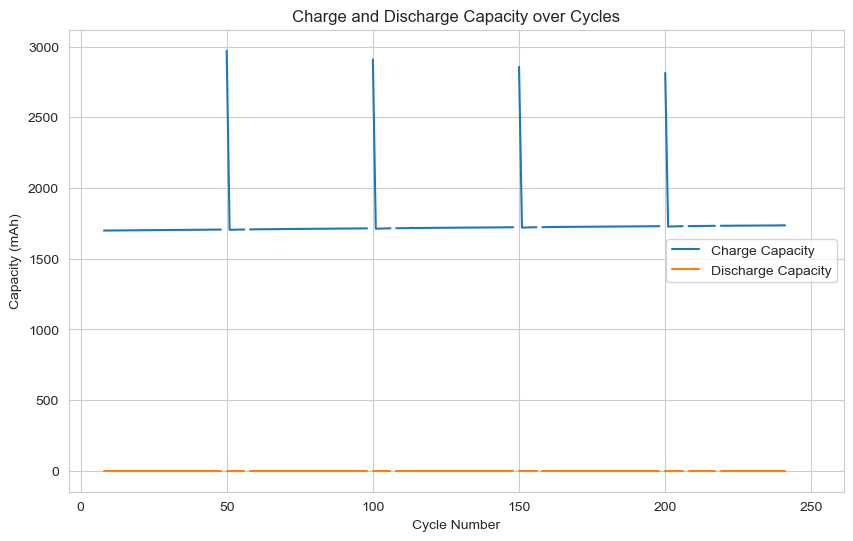

In [219]:
# Plot the extracted features
plt.figure(figsize=(10, 6))
plt.plot(features_df['cycleNumber'], features_df['charge_capacity'], label='Charge Capacity')
plt.plot(features_df['cycleNumber'], features_df['discharge_capacity'], label='Discharge Capacity')
plt.title('Charge and Discharge Capacity over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (mAh)')
plt.legend()
plt.show()

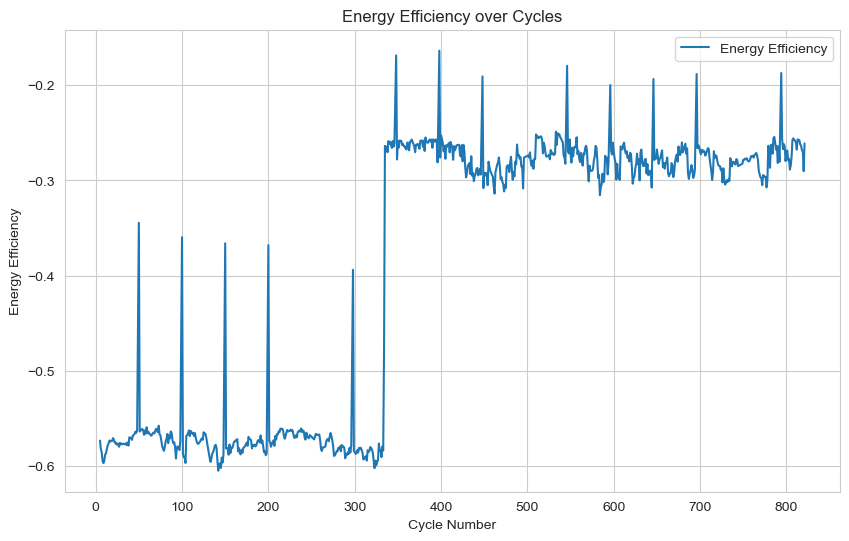

In [164]:
plt.figure(figsize=(10, 6))
plt.plot(features_df['cycleNumber'], features_df['energy_efficiency'], label='Energy Efficiency')
plt.title('Energy Efficiency over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Energy Efficiency')
plt.legend()
plt.show()

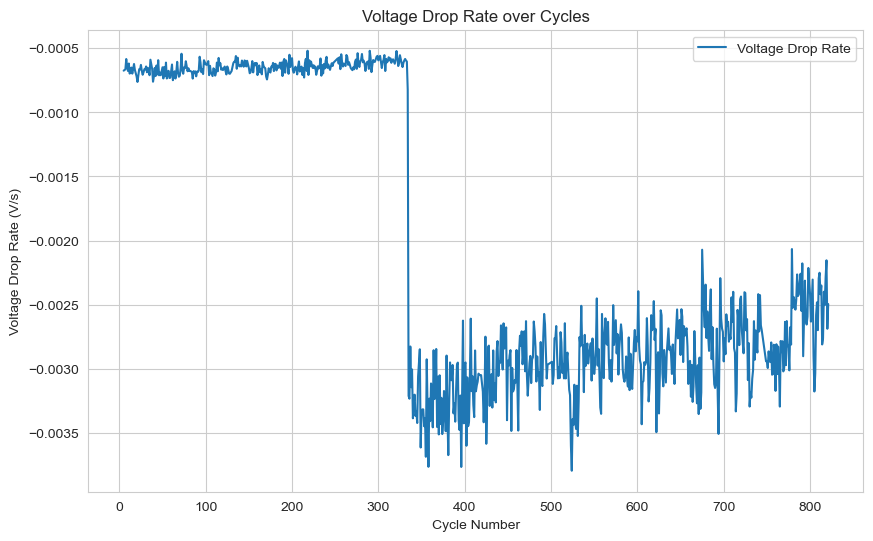

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(features_df['cycleNumber'], features_df['voltage_drop_rate'], label='Voltage Drop Rate')
plt.title('Voltage Drop Rate over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Voltage Drop Rate (V/s)')
plt.legend()
plt.show()

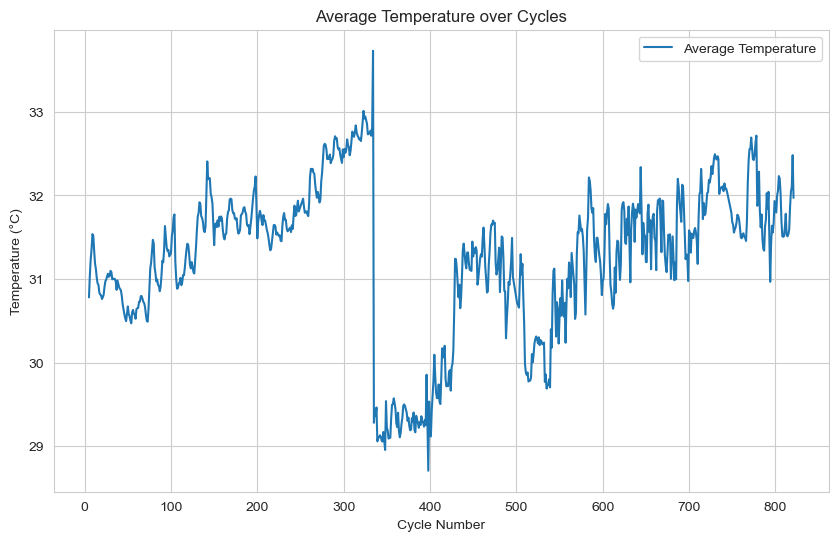

In [168]:
plt.figure(figsize=(10, 6))
plt.plot(features_df['cycleNumber'], features_df['avg_temperature'], label='Average Temperature')
plt.title('Average Temperature over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

## 5. Analyze Degradation Patterns
Analyze capacity fade over cycles, identify degradation patterns under different experimental conditions, and compare performance across protocols.

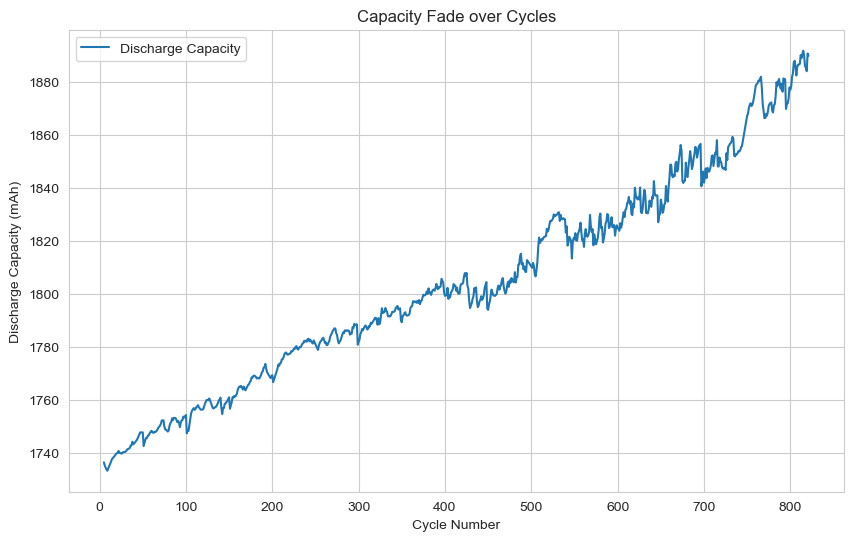

In [169]:
# Plot capacity fade over cycles
plt.figure(figsize=(10, 6))
plt.plot(features_df['cycleNumber'], features_df['discharge_capacity'], label='Discharge Capacity')
plt.title('Capacity Fade over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (mAh)')
plt.legend()
plt.show()

/var/folders/xr/hj4wtrpx2r9gjxdwx07b9z4h0000gn/T/ipykernel_14086/3593114669.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


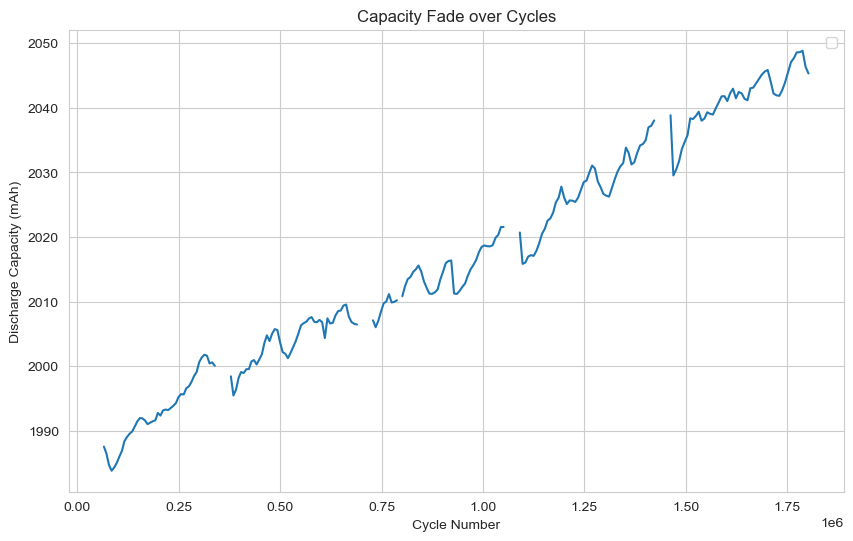

In [203]:
# Plot capacity fade over cycles
plt.figure(figsize=(10, 6))
plt.plot(features_df['time'], features_df['discharge_capacity'])
plt.title('Capacity Fade over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (mAh)')
plt.legend()
plt.show()

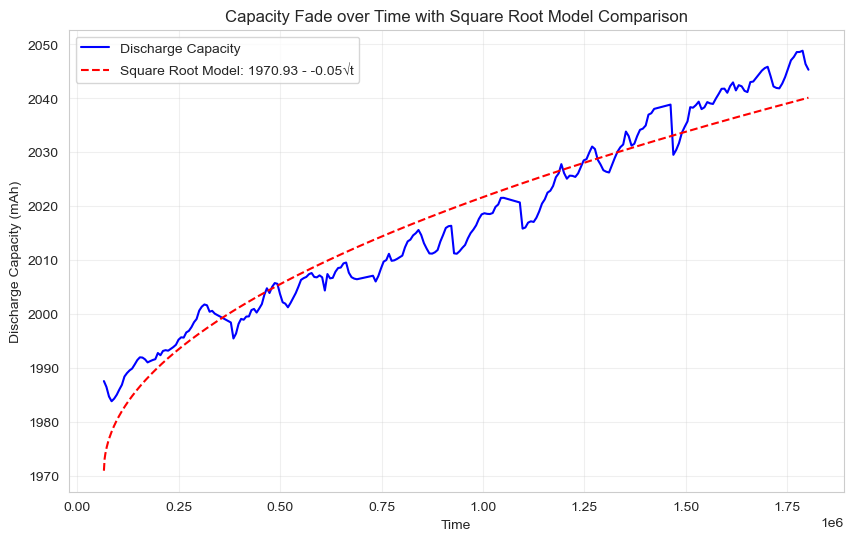

Square root model: C(t) = 1970.93 - -0.05√t
Where t is time starting from 65849.5011285595


In [204]:
# Plot capacity fade over time with square root comparison
import numpy as np
from scipy.optimize import curve_fit

# Define square root function for fitting
def sqrt_model(x, a, b):
    return a - b * np.sqrt(x)

# Copy data and drop NaN values
plot_data = features_df[['time', 'discharge_capacity']].dropna()

# Sort data by time
plot_data = plot_data.sort_values('time')

# Fit square root model to data
# Shift time to start at 0 if needed
time_shifted = plot_data['time'] - plot_data['time'].min()
popt, pcov = curve_fit(sqrt_model, time_shifted, plot_data['discharge_capacity'])

# Generate fitted curve
x_fit = np.linspace(time_shifted.min(), time_shifted.max(), 1000)
y_fit = sqrt_model(x_fit, *popt)

# Plot both curves
plt.figure(figsize=(10, 6))
plt.plot(plot_data['time'], plot_data['discharge_capacity'], 'b-', label='Discharge Capacity')
plt.plot(x_fit + plot_data['time'].min(), y_fit, 'r--', 
         label=f'Square Root Model: {popt[0]:.2f} - {popt[1]:.2f}√t')

plt.title('Capacity Fade over Time with Square Root Model Comparison')
plt.xlabel('Time')
plt.ylabel('Discharge Capacity (mAh)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print model parameters
print(f"Square root model: C(t) = {popt[0]:.2f} - {popt[1]:.2f}√t")
print(f"Where t is time starting from {plot_data['time'].min()}")

In [170]:
# Identify degradation patterns under different experimental conditions
# Load additional datasets
file_paths = ['data/VAH02.csv', 'data/VAH05.csv', 'data/VAH06.csv']  # Update these paths to your dataset locations
datasets = [pd.read_csv(file_path) for file_path in file_paths]

# Extract features from each dataset
all_features = []
for i, dataset in enumerate(datasets):
    cycle_features = []
    unique_cycles = dataset['cycleNumber'].unique()
    for cycle in unique_cycles:
        cycle_data = dataset[dataset['cycleNumber'] == cycle]
        features = extract_features(cycle_data)
        features['cycleNumber'] = cycle
        features['protocol'] = f'VAH{str(i+2).zfill(2)}'
        cycle_features.append(features)
    all_features.extend(cycle_features)

# Convert the list of dictionaries to a DataFrame
all_features_df = pd.DataFrame(all_features)



/Users/christopher/mambaforge/envs/ramp/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


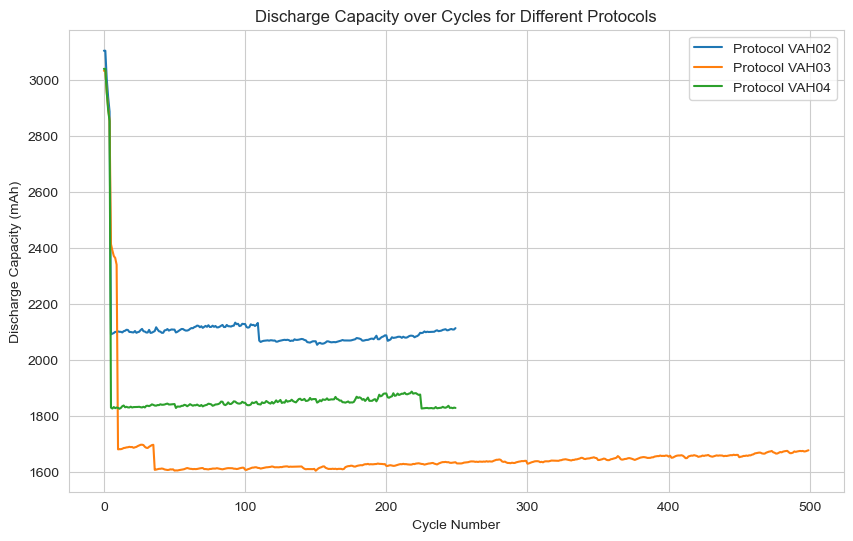

In [98]:
# Compare performance across protocols
plt.figure(figsize=(10, 6))
for protocol in all_features_df['protocol'].unique():
    protocol_data = all_features_df[all_features_df['protocol'] == protocol]
    plt.plot(protocol_data['cycleNumber'], protocol_data['discharge_capacity'], label=f'Protocol {protocol}')
plt.title('Discharge Capacity over Cycles for Different Protocols')
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (mAh)')
plt.legend()
plt.show()

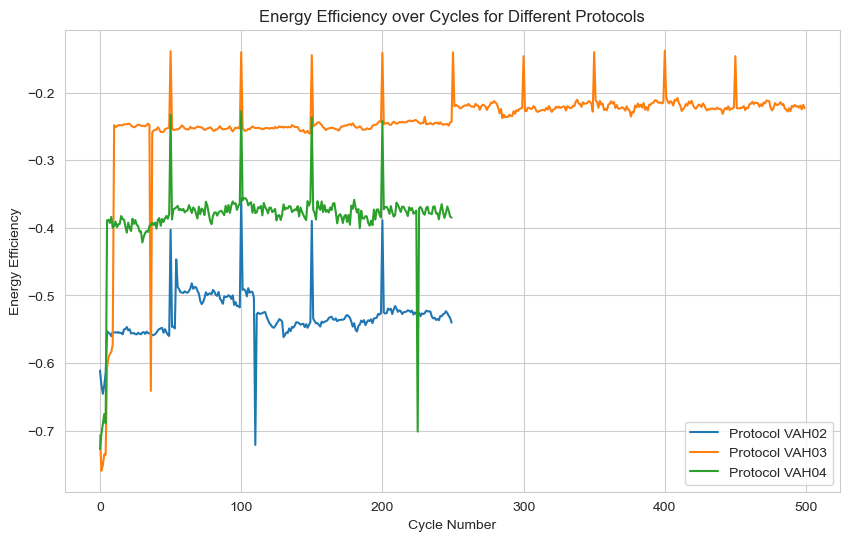

In [35]:
plt.figure(figsize=(10, 6))
for protocol in all_features_df['protocol'].unique():
    protocol_data = all_features_df[all_features_df['protocol'] == protocol]
    plt.plot(protocol_data['cycleNumber'], protocol_data['energy_efficiency'], label=f'Protocol {protocol}')
plt.title('Energy Efficiency over Cycles for Different Protocols')
plt.xlabel('Cycle Number')
plt.ylabel('Energy Efficiency')
plt.legend()
plt.show()

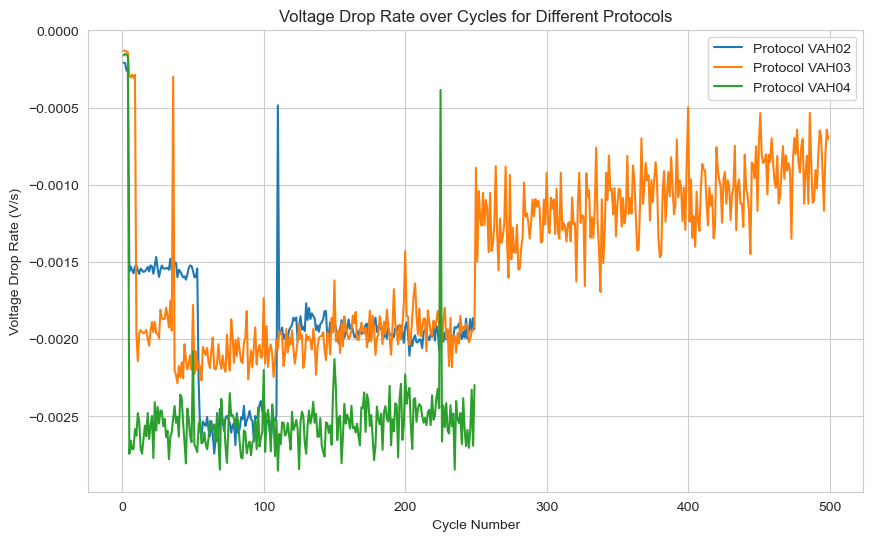

In [21]:
plt.figure(figsize=(10, 6))
for protocol in all_features_df['protocol'].unique():
    protocol_data = all_features_df[all_features_df['protocol'] == protocol]
    plt.plot(protocol_data['cycleNumber'], protocol_data['voltage_drop_rate'], label=f'Protocol {protocol}')
plt.title('Voltage Drop Rate over Cycles for Different Protocols')
plt.xlabel('Cycle Number')
plt.ylabel('Voltage Drop Rate (V/s)')
plt.legend()
plt.show()

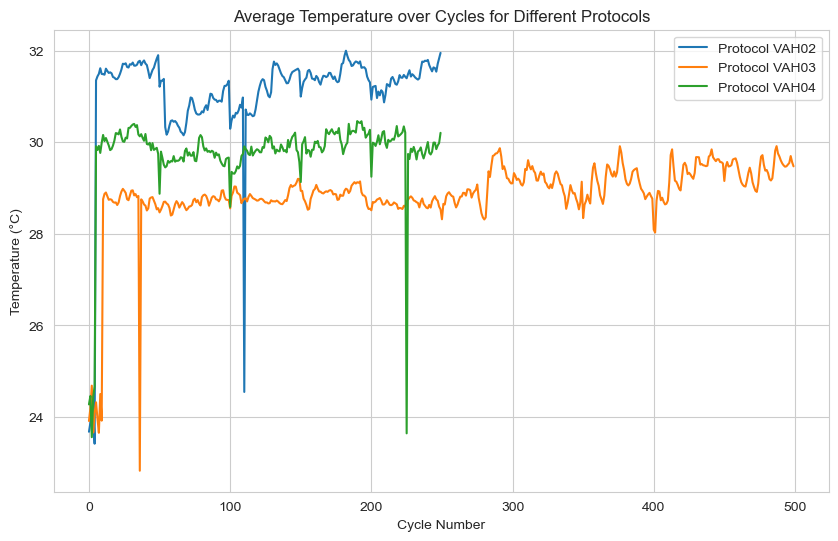

In [22]:
plt.figure(figsize=(10, 6))
for protocol in all_features_df['protocol'].unique():
    protocol_data = all_features_df[all_features_df['protocol'] == protocol]
    plt.plot(protocol_data['cycleNumber'], protocol_data['avg_temperature'], label=f'Protocol {protocol}')
plt.title('Average Temperature over Cycles for Different Protocols')
plt.xlabel('Cycle Number')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

## 6. Prepare Data for Modeling
Transform the extracted features into a format suitable for machine learning models, including creating cycle-level features, handling missing data, and preparing training/testing splits.

In [27]:
# Prepare Data for Modeling

# First, check if 'cycleNumber' exists
if 'cycleNumber' not in features_df.columns:
    print("Warning: 'cycleNumber' column not found in features_df")
    # If it doesn't exist, we'll modify the code accordingly
    columns_to_drop = []
else:
    columns_to_drop = ['cycleNumber']

# Handle missing data by filling with the mean value of each column
features_df.fillna(features_df.mean(), inplace=True)

# Check for any remaining NaN values or infinite values
if features_df.isnull().sum().sum() > 0:
    print("Warning: There are still NaN values after filling with mean")
    # More aggressive approach to handle NaNs
    features_df = features_df.dropna(axis=1)  # Drop columns with remaining NaNs

# Replace any infinite values
features_df = features_df.replace([np.inf, -np.inf], np.nan)
features_df.fillna(features_df.mean(), inplace=True)

# Make sure all columns to be scaled are numeric
numeric_cols = features_df.select_dtypes(include=np.number).columns
features_to_scale = features_df[numeric_cols].drop(columns=columns_to_drop, errors='ignore')

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Add back the cycleNumber if it exists
if 'cycleNumber' in features_df.columns:
    scaled_features_df['cycleNumber'] = features_df['cycleNumber'].values

# Split the data into training and testing sets
X = scaled_features_df.drop(columns=['discharge_capacity'], errors='ignore')
y = scaled_features_df['discharge_capacity'] if 'discharge_capacity' in scaled_features_df.columns else features_df['discharge_capacity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 5), (50, 5), (200,), (50,))

## 7. Benchmark Model Implementation
Implement a baseline model to predict battery degradation or remaining useful life using scikit-learn pipelines.

In [28]:
# Benchmark Model Implementation

# Define the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.000975925247280763
R^2 Score: 0.9293673306206214


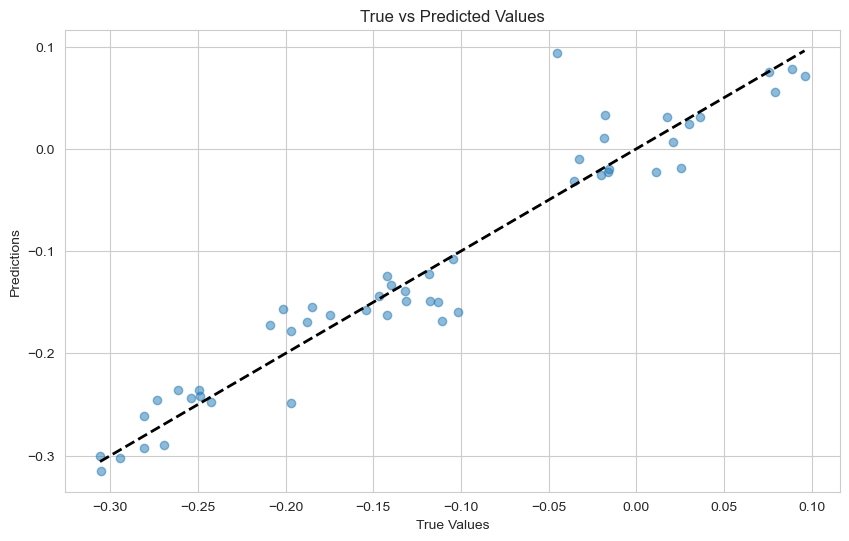

In [29]:
# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()